In [1]:
# import the required packages
import pandas as pd
import numpy as np
import statistics as st
import plotly.express as px

# import for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('./data/customer.csv')
employee = pd.read_csv('./data/employee.csv')
order = pd.read_csv('./data/order_updated.csv')
order_detail = pd.read_csv('./data/order_detail.csv')
product = pd.read_csv('./data/product.csv')
shipper = pd.read_csv('./data/shipper.csv')
supplier = pd.read_csv('./data/supplier.csv')
category = pd.read_csv('./data/category.csv')
employee_territory = pd.read_csv('./data/employee_territory.csv')
region = pd.read_csv('./data/region.csv')
territory = pd.read_csv('./data/territory.csv')

## Customer

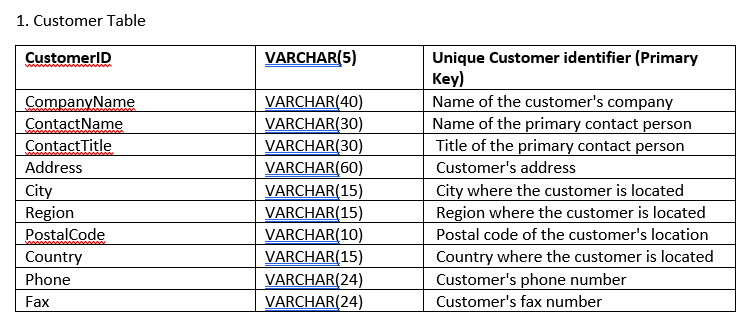

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customerID    91 non-null     object
 1   companyName   91 non-null     object
 2   contactName   91 non-null     object
 3   contactTitle  91 non-null     object
 4   address       91 non-null     object
 5   city          91 non-null     object
 6   region        31 non-null     object
 7   postalCode    90 non-null     object
 8   country       91 non-null     object
 9   phone         91 non-null     object
 10  fax           69 non-null     object
dtypes: object(11)
memory usage: 7.9+ KB


In [4]:
customer.isnull().sum()

customerID       0
companyName      0
contactName      0
contactTitle     0
address          0
city             0
region          60
postalCode       1
country          0
phone            0
fax             22
dtype: int64

In [5]:
customer.head()

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [6]:
customer[customer['postalCode'].isna()]

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
36,HUNGO,Hungry Owl All-Night Grocers,Patricia McKenna,Sales Associate,8 Johnstown Road,Cork,Co. Cork,NaN,Ireland,2967 542,2967 3333


In [7]:
for col in customer.columns:
    max_l = customer[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

customerID - 5
companyName - 36
contactName - 23
contactTitle - 30
address - 46
city - 17
region - 13
postalCode - 9
country - 11
phone - 17
fax - 17


Only column `city` exceeded the varchar requirement from data dict

In [8]:
customer[customer['city'].astype(str).str.len() > 15]

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
60,QUEDE,Que Delícia,Bernardo Batista,Accounting Manager,Rua da Panificadora,12Rio de Janeiro,RJ,02389-673,Brazil,(21) 555-4252,(21) 555-4545


In [9]:
customer[(customer['phone'] == customer['fax'])]

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,NaN,90110,Finland,981-443655,981-443655
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,NaN,21240,Finland,90-224 8858,90-224 8858
90,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,Warszawa,NaN,01-012,Poland,(26) 642-7012,(26) 642-7012


In [10]:
for col in customer.columns:
    dupli = customer[col].duplicated().any()
    print(f"{col} - {dupli}")

customerID - False
companyName - False
contactName - False
contactTitle - True
address - False
city - True
region - True
postalCode - True
country - True
phone - False
fax - True


In [11]:
customer[customer.duplicated(subset=['postalCode'], keep=False)]

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
11,CACTU,Cactus Comidas para llevar,Patricio Simpson,Sales Agent,Cerrito 333,Buenos Aires,NaN,1010,Argentina,(1) 135-5555,(1) 135-4892
17,DUMON,Du monde entier,Janine Labrune,Owner,67 rue des Cinquante Otages,Nantes,NaN,44000,France,40.67.88.88,40.67.89.89
25,FRANR,France restauration,Carine Schmitt,Marketing Manager,54 rue Royale,Nantes,NaN,44000,France,40.32.21.21,40.32.21.20
53,OCEAN,Océano Atlántico Ltda.,Yvonne Moncada,Sales Agent,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,NaN,1010,Argentina,(1) 135-5333,(1) 135-5535
57,PERIC,Pericles Comidas clásicas,Guillermo Fernández,Sales Representative,Calle Dr. Jorge Cash 321,México D.F.,NaN,05033,Mexico,(5) 552-3745,(5) 545-3745
63,RANCH,Rancho grande,Sergio Gutiérrez,Sales Representative,Av. del Libertador 900,Buenos Aires,NaN,1010,Argentina,(1) 123-5555,(1) 123-5556
79,TORTU,Tortuga Restaurante,Miguel Angel Paolino,Owner,Avda. Azteca 123,México D.F.,NaN,05033,Mexico,(5) 555-2933,NaN


Are different addresses with same `postalCode` valid?

In [12]:
customer[customer.duplicated(subset=['fax'], keep=False)]

,customerID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
10,BSBEV,B's Beverages,Victoria Ashworth,Sales Representative,Fauntleroy Circus,London,NaN,EC2 5NT,UK,(171) 555-1212,NaN
13,CHOPS,Chop-suey Chinese,Yang Wang,Owner,Hauptstr. 29,Bern,NaN,3012,Switzerland,0452-076545,NaN
14,COMMI,Comércio Mineiro,Pedro Afonso,Sales Associate,23 Av. dos Lusíadas,Sao Paulo,SP,05432-043,Brazil,(11) 555-7647,NaN
20,FAMIA,Familia Arquibaldo,Aria Cruz,Marketing Assistant,Rua Orós 92,Sao Paulo,SP,05442-030,Brazil,(11) 555-9857,NaN
23,FOLKO,Folk och fä HB,Maria Larsson,Owner,Åkergatan 24,Bräcke,NaN,S-844 67,Sweden,0695-34 67 21,NaN
29,GODOS,Godos Cocina Típica,José Pedro Freyre,Sales Manager,C/ Romero 33,Sevilla,NaN,41101,Spain,(95) 555 82 82,NaN
30,GOURL,Gourmet Lanchonetes,André Fonseca,Sales Associate,Av. Brasil 442,Campinas,SP,04876-786,Brazil,(11) 555-9482,NaN
31,GREAL,Great Lakes Food Market,Howard Snyder,Marketing Manager,2732 Baker Blvd.,Eugene,OR,97403,USA,(503) 555-7555,NaN
37,ISLAT,Island Trading,Helen Bennett,Marketing Manager,Garden House Crowther Way,Cowes,Isle of Wight,PO31 7PJ,UK,(198) 555-8888,NaN


In [13]:
columns = ['city','region','country']

for col in columns:
    unique_values = customer[col].unique()
    print(f"Unique values in '{col}':")
    for value in unique_values:
        print(value)
    print()

Unique values in 'city':
Berlin
México D.F.
London
Luleå
Mannheim
Strasbourg
Madrid
Marseille
Tsawassen
Buenos Aires
Bern
Sao Paulo
Aachen
Nantes
Graz
Lille
Bräcke
München
Torino
Lisboa
Barcelona
Sevilla
Campinas
Eugene
Caracas
Rio de Janeiro
San Cristóbal
Elgin
Cork
Cowes
Brandenburg
Versailles
Toulouse
Vancouver
Walla Walla
Frankfurt a.M.
San Francisco
Barquisimeto
I. de Margarita
Portland
Bergamo
Bruxelles
Montréal
Leipzig
Anchorage
Köln
Paris
Salzburg
 12Rio de Janeiro
Cunewalde
Albuquerque
Reggio Emilia
Genève
Stavern
Boise
Kobenhavn
Lander
Charleroi
Butte
Münster
Kirkland
Århus
Lyon
Reims
Stuttgart
Oulu
Resende
Seattle
Helsinki
Warszawa

Unique values in 'region':
nan
BC
SP
OR
DF
RJ
Táchira
Co. Cork
Isle of Wight
WA
CA
Lara
Nueva Esparta
Québec
AK
NM
ID
WY
MT

Unique values in 'country':
Germany
Mexico
UK
Sweden
France
Spain
Canada
Argentina
Switzerland
Brazil
Austria
Italy
Portugal
USA
Venezuela
Ireland
Belgium
Norway
Denmark
Finland
Poland



In [14]:
customer.nunique()

customerID      91
companyName     91
contactName     91
contactTitle    12
address         91
city            70
region          18
postalCode      86
country         21
phone           91
fax             69
dtype: int64

## Employee

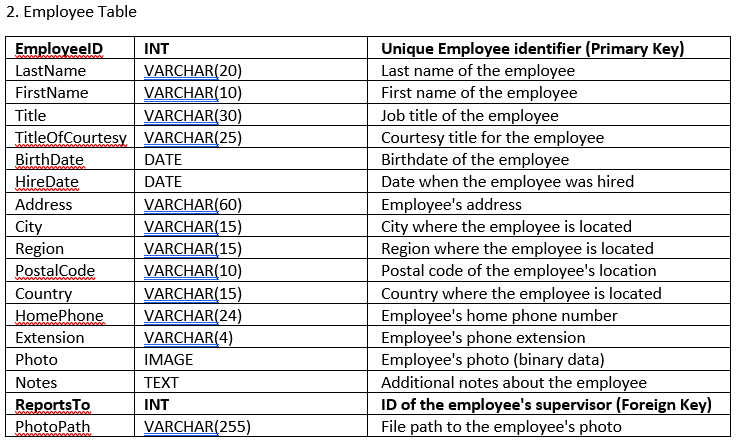

In [15]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   employeeID       9 non-null      int64  
 1   lastName         9 non-null      object 
 2   firstName        9 non-null      object 
 3   title            9 non-null      object 
 4   titleOfCourtesy  9 non-null      object 
 5   birthDate        9 non-null      object 
 6   hireDate         9 non-null      object 
 7   address          9 non-null      object 
 8   city             9 non-null      object 
 9   region           5 non-null      object 
 10  postalCode       9 non-null      object 
 11  country          9 non-null      object 
 12  homePhone        9 non-null      object 
 13  extension        9 non-null      int64  
 14  photo            9 non-null      object 
 15  notes            9 non-null      object 
 16  reportsTo        8 non-null      float64
 17  photoPath        9 n

In [16]:
employee.isnull().sum()

employeeID         0
lastName           0
firstName          0
title              0
titleOfCourtesy    0
birthDate          0
hireDate           0
address            0
city               0
region             4
postalCode         0
country            0
homePhone          0
extension          0
photo              0
notes              0
reportsTo          1
photoPath          0
dtype: int64

In [17]:
employee.head()

,employeeID,lastName,firstName,title,titleOfCourtesy,birthDate,hireDate,address,city,region,postalCode,country,homePhone,extension,photo,notes,reportsTo,photoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 20th Ave. E. Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,Vice President Sales,Dr.,1952-02-19 00:00:00.000,1992-08-14 00:00:00.000,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30 00:00:00.000,1992-04-01 00:00:00.000,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19 00:00:00.000,1993-05-03 00:00:00.000,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04 00:00:00.000,1993-10-17 00:00:00.000,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [18]:
employee[employee['reportsTo'].isnull()]

,employeeID,lastName,firstName,title,titleOfCourtesy,birthDate,hireDate,address,city,region,postalCode,country,homePhone,extension,photo,notes,reportsTo,photoPath
1,2,Fuller,Andrew,Vice President Sales,Dr.,1952-02-19 00:00:00.000,1992-08-14 00:00:00.000,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp


In [19]:
employee.nunique()

employeeID         9
lastName           9
firstName          9
title              4
titleOfCourtesy    4
birthDate          9
hireDate           8
address            9
city               5
region             1
postalCode         9
country            2
homePhone          9
extension          9
photo              3
notes              9
reportsTo          2
photoPath          5
dtype: int64

In [20]:
employee['reportsTo'].value_counts()

2.0    5
5.0    3
Name: reportsTo, dtype: int64

In [21]:
employee[employee['employeeID']==5]

,employeeID,lastName,firstName,title,titleOfCourtesy,birthDate,hireDate,address,city,region,postalCode,country,homePhone,extension,photo,notes,reportsTo,photoPath
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04 00:00:00.000,1993-10-17 00:00:00.000,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp


In [22]:
for col in employee.columns:
    max_l = employee[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

employeeID - 1
lastName - 9
firstName - 8
title - 24
titleOfCourtesy - 4
birthDate - 23
hireDate - 23
address - 29
city - 8
region - 3
postalCode - 7
country - 3
homePhone - 14
extension - 4
photo - 256
notes - 253
reportsTo - 3
photoPath - 38


In [23]:
for col in employee.columns:
    dupli = employee[col].duplicated().any()
    print(f"{col} - {dupli}")

employeeID - False
lastName - False
firstName - False
title - True
titleOfCourtesy - True
birthDate - False
hireDate - True
address - False
city - True
region - True
postalCode - False
country - True
homePhone - False
extension - False
photo - True
notes - False
reportsTo - True
photoPath - True


In [24]:
employee[employee.duplicated(subset=['photo'], keep=False)]

,employeeID,lastName,firstName,title,titleOfCourtesy,birthDate,hireDate,address,city,region,postalCode,country,homePhone,extension,photo,notes,reportsTo,photoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 20th Ave. E. Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,Vice President Sales,Dr.,1952-02-19 00:00:00.000,1992-08-14 00:00:00.000,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19 00:00:00.000,1993-05-03 00:00:00.000,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04 00:00:00.000,1993-10-17 00:00:00.000,14 Garrett Hill,London,NaN,SW1 8JR,UK,(71) 555-4848,3453,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02 00:00:00.000,1993-10-17 00:00:00.000,Coventry House Miner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09 00:00:00.000,1994-03-05 00:00:00.000,4726 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27 00:00:00.000,1994-11-15 00:00:00.000,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [25]:
employee[employee.duplicated(subset=['photoPath'], keep=False)]

,employeeID,lastName,firstName,title,titleOfCourtesy,birthDate,hireDate,address,city,region,postalCode,country,homePhone,extension,photo,notes,reportsTo,photoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 20th Ave. E. Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02 00:00:00.000,1993-10-17 00:00:00.000,Coventry House Miner Rd.,London,NaN,EC2 7JR,UK,(71) 555-7773,428,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1960-05-29 00:00:00.000,1994-01-02 00:00:00.000,Edgeham Hollow Winchester Way,London,NaN,RG1 9SP,UK,(71) 555-5598,465,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09 00:00:00.000,1994-03-05 00:00:00.000,4726 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27 00:00:00.000,1994-11-15 00:00:00.000,7 Houndstooth Rd.,London,NaN,WG2 7LT,UK,(71) 555-4444,452,0x151C2F00020000000D000E0014002100FFFFFFFF4269...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [26]:
employee.nunique()

employeeID         9
lastName           9
firstName          9
title              4
titleOfCourtesy    4
birthDate          9
hireDate           8
address            9
city               5
region             1
postalCode         9
country            2
homePhone          9
extension          9
photo              3
notes              9
reportsTo          2
photoPath          5
dtype: int64

## Order
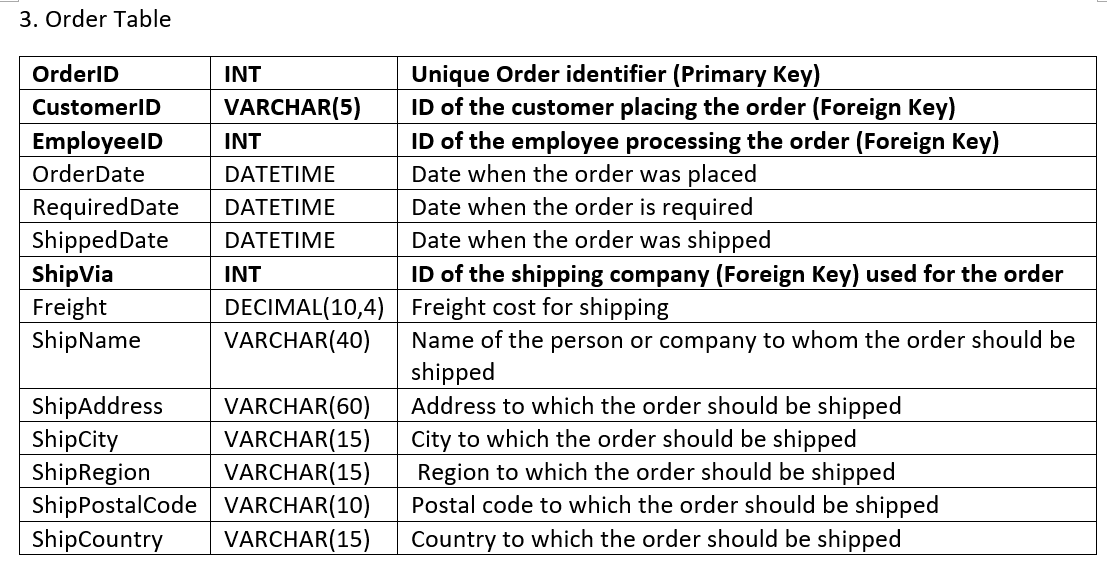

In [27]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderID         800 non-null    float64
 1   customerID      800 non-null    object 
 2   employeeID      800 non-null    float64
 3   orderDate       800 non-null    object 
 4   requiredDate    800 non-null    object 
 5   shippedDate     795 non-null    object 
 6   shipVia         800 non-null    float64
 7   freight         800 non-null    float64
 8   shipName        800 non-null    object 
 9   shipAddress     800 non-null    object 
 10  shipCity        800 non-null    object 
 11  shipRegion      310 non-null    object 
 12  shipPostalCode  782 non-null    object 
 13  shipCountry     800 non-null    object 
dtypes: float64(4), object(10)
memory usage: 90.9+ KB


In [28]:
order.isnull().sum()

orderID            30
customerID         30
employeeID         30
orderDate          30
requiredDate       30
shippedDate        35
shipVia            30
freight            30
shipName           30
shipAddress        30
shipCity           30
shipRegion        520
shipPostalCode     48
shipCountry        30
dtype: int64

In [29]:
order[order['orderID'].isnull()]

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry
800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
order_null = order[order['orderID'].isnull()]
order_null.nunique()

orderID           0
customerID        0
employeeID        0
orderDate         0
requiredDate      0
shippedDate       0
shipVia           0
freight           0
shipName          0
shipAddress       0
shipCity          0
shipRegion        0
shipPostalCode    0
shipCountry       0
dtype: int64

In [31]:
order = order[order['orderID'].notnull()]

In [32]:
order.isnull().sum()

orderID             0
customerID          0
employeeID          0
orderDate           0
requiredDate        0
shippedDate         5
shipVia             0
freight             0
shipName            0
shipAddress         0
shipCity            0
shipRegion        490
shipPostalCode     18
shipCountry         0
dtype: int64

In [33]:
order.head()

,orderID,customerID,employeeID,orderDate,requiredDate,shippedDate,shipVia,freight,shipName,shipAddress,shipCity,shipRegion,shipPostalCode,shipCountry
0,10248.0,VINET,5.0,04-Jul-1996,01-Aug-1996,16-Jul-1996,3.0,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249.0,TOMSP,6.0,05-Jul-1996,16-Aug-1996,10-Jul-1996,1.0,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250.0,HANAR,4.0,08-Jul-1996,05-Aug-1996,12-Jul-1996,2.0,65.83,Hanari Carnes,Rua do Paço 67,Rio de Janeiro,RJ,05454-876,Brazil
3,10251.0,VICTE,3.0,08-Jul-1996,05-Aug-1996,15-Jul-1996,1.0,41.34,Victuailles en stock,2 rue du Commerce,Lyon,NaN,69004,France
4,10252.0,SUPRD,4.0,09-Jul-1996,06-Aug-1996,11-Jul-1996,2.0,51.30,Suprêmes délices,Boulevard Tirou 255,Charleroi,NaN,B-6000,Belgium


In [34]:
for col in order.columns:
    max_l = order[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

orderID - 7
customerID - 5
employeeID - 3
orderDate - 11
requiredDate - 11
shippedDate - 11
shipVia - 3
freight - 7
shipName - 34
shipAddress - 46
shipCity - 15
shipRegion - 13
shipPostalCode - 9
shipCountry - 11


In [35]:
for col in order.columns:
    dupli = order[col].duplicated().any()
    print(f"{col} - {dupli}")

orderID - False
customerID - True
employeeID - True
orderDate - True
requiredDate - True
shippedDate - True
shipVia - True
freight - True
shipName - True
shipAddress - True
shipCity - True
shipRegion - True
shipPostalCode - True
shipCountry - True


In [36]:
order.nunique()

orderID           800
customerID         89
employeeID          9
orderDate         472
requiredDate      445
shippedDate       385
shipVia             3
freight           771
shipName           90
shipAddress        89
shipCity           70
shipRegion         19
shipPostalCode     83
shipCountry        21
dtype: int64

## Order Detail
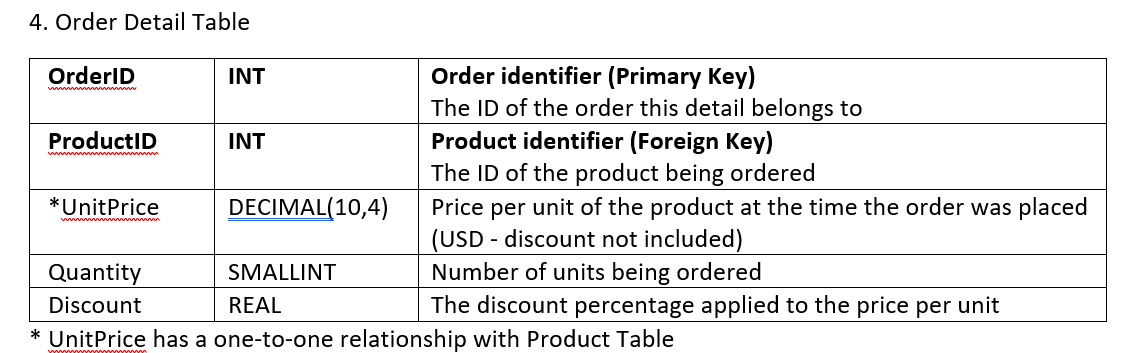

In [37]:
order_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   orderID    2062 non-null   int64  
 1   productID  2062 non-null   int64  
 2   unitPrice  2062 non-null   float64
 3   quantity   2062 non-null   int64  
 4   discount   2062 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 80.7 KB


In [38]:
order_detail.head()

,orderID,productID,unitPrice,quantity,discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [39]:
for col in order_detail.columns:
    max_l = order_detail[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

orderID - 5
productID - 2
unitPrice - 6
quantity - 3
discount - 4


In [40]:
for col in order_detail.columns:
    dupli = order_detail[col].duplicated().any()
    print(f"{col} - {dupli}")

orderID - True
productID - True
unitPrice - True
quantity - True
discount - True


In [41]:
order_detail.nunique()

orderID      800
productID     77
unitPrice    116
quantity      54
discount       6
dtype: int64

In [42]:
order_detail['discount'].value_counts()

0.00    1269
0.05     179
0.10     166
0.20     151
0.25     149
0.15     148
Name: discount, dtype: int64

In [44]:
result_df = order_detail.groupby('productID')['unitPrice'].mean().round(2).reset_index()

# Printing the result
print(result_df)

    productID  unitPrice
0           1      17.12
1           2      17.73
2           3       9.45
3           4      20.61
4           5      19.61
..        ...        ...
72         73      14.31
73         74       8.77
74         75       7.37
75         76      16.93
76         77      12.03

[77 rows x 2 columns]


In [45]:
temp = product.groupby('productID')['unitPrice'].mean().round(2).reset_index()

# Printing the result
print(temp)

    productID  unitPrice
0           1      18.00
1           2      19.00
2           3      10.00
3           4      22.00
4           5      21.35
..        ...        ...
72         73      15.00
73         74      10.00
74         75       7.75
75         76      18.00
76         77      13.00

[77 rows x 2 columns]


## Product
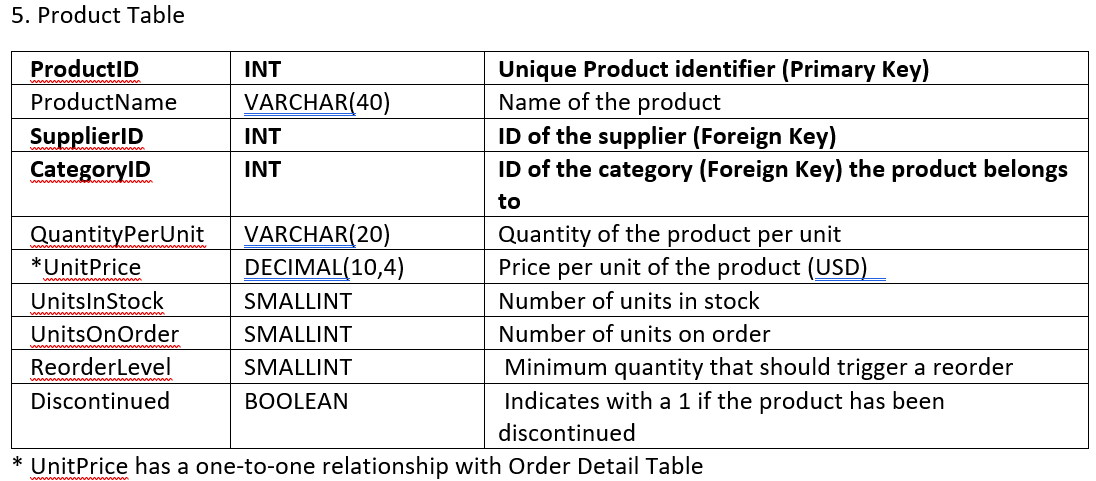

In [44]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   productID        77 non-null     int64  
 1   productName      77 non-null     object 
 2   supplierID       77 non-null     int64  
 3   categoryID       77 non-null     int64  
 4   quantityPerUnit  77 non-null     object 
 5   unitPrice        77 non-null     float64
 6   unitsInStock     77 non-null     int64  
 7   unitsOnOrder     77 non-null     int64  
 8   reorderLevel     77 non-null     int64  
 9   discontinued     77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB


In [45]:
product.head()

,productID,productName,supplierID,categoryID,quantityPerUnit,unitPrice,unitsInStock,unitsOnOrder,reorderLevel,discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [47]:
for col in product.columns:
    max_l = product[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

productID - 2
productName - 32
supplierID - 2
categoryID - 1
quantityPerUnit - 20
unitPrice - 6
unitsInStock - 3
unitsOnOrder - 3
reorderLevel - 2
discontinued - 1


In [50]:
for col in product.columns:
    dupli = product[col].duplicated().any()
    print(f"{col} - {dupli}")

productID - False
productName - False
supplierID - True
categoryID - True
quantityPerUnit - True
unitPrice - True
unitsInStock - True
unitsOnOrder - True
reorderLevel - True
discontinued - True


In [51]:
product.nunique()

productID          77
productName        77
supplierID         29
categoryID          8
quantityPerUnit    70
unitPrice          62
unitsInStock       51
unitsOnOrder       10
reorderLevel        7
discontinued        2
dtype: int64

## Shipper
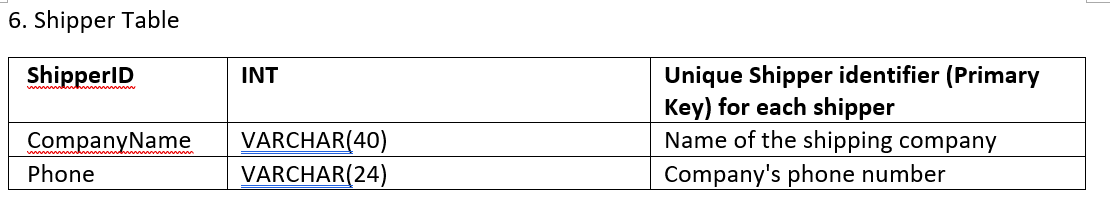

In [52]:
shipper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   shipperID    3 non-null      int64 
 1   companyName  3 non-null      object
 2   phone        3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


In [53]:
shipper.head()

,shipperID,companyName,phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [54]:
for col in shipper.columns:
    max_l = shipper[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

shipperID - 1
companyName - 16
phone - 14


## Supplier
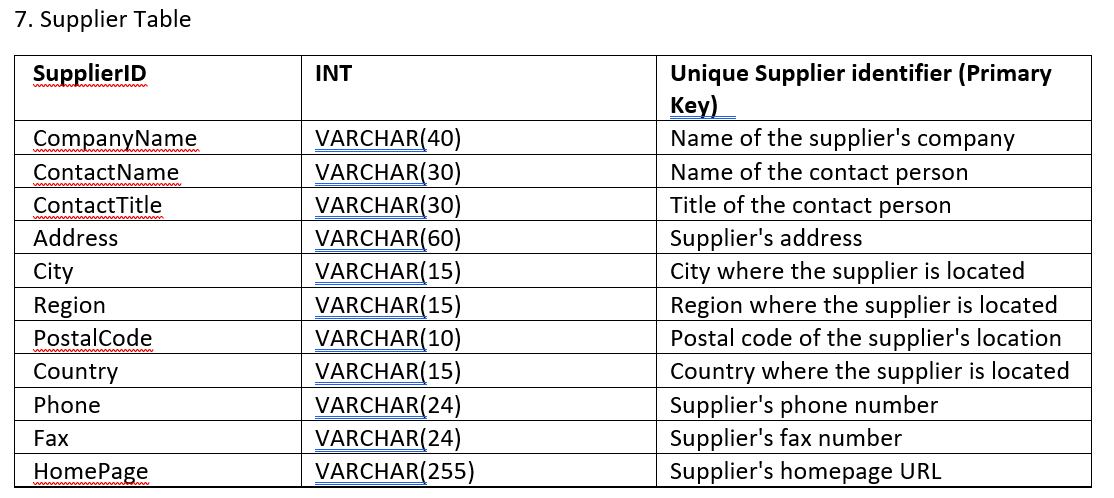

In [56]:
supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   supplierID    29 non-null     int64 
 1   companyName   29 non-null     object
 2   contactName   29 non-null     object
 3   contactTitle  29 non-null     object
 4   address       29 non-null     object
 5   city          29 non-null     object
 6   region        9 non-null      object
 7   postalCode    29 non-null     object
 8   country       29 non-null     object
 9   phone         29 non-null     object
 10  fax           13 non-null     object
 11  homePage      5 non-null      object
dtypes: int64(1), object(11)
memory usage: 2.8+ KB


In [57]:
supplier.isnull().sum()

supplierID       0
companyName      0
contactName      0
contactTitle     0
address          0
city             0
region          20
postalCode       0
country          0
phone            0
fax             16
homePage        24
dtype: int64

In [58]:
supplier.head()

,supplierID,companyName,contactName,contactTitle,address,city,region,postalCode,country,phone,fax,homePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,NaN,EC1 4SD,UK,(171) 555-2222,NaN,NaN
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,NaN,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,NaN
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,NaN,100,Japan,(03) 3555-5011,NaN,NaN
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Asturias,33007,Spain,(98) 598 76 54,NaN,NaN


In [59]:
for col in supplier.columns:
    max_l = supplier[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

supplierID - 2
companyName - 38
contactName - 26
contactTitle - 28
address - 45
city - 13
region - 8
postalCode - 8
country - 11
phone - 15
fax - 15
homePage - 94


In [60]:
for col in supplier.columns:
    dupli = supplier[col].duplicated().any()
    print(f"{col} - {dupli}")

supplierID - False
companyName - False
contactName - False
contactTitle - True
address - False
city - False
region - True
postalCode - False
country - True
phone - False
fax - True
homePage - True


In [61]:
supplier.nunique()

supplierID      29
companyName     29
contactName     29
contactTitle    15
address         29
city            29
region           8
postalCode      29
country         16
phone           29
fax             13
homePage         5
dtype: int64

In [63]:
supplier['homePage'].value_counts()

#CAJUN.HTM#                                                                                       1
Mayumi's (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/mayumi.htm#        1
Plutzer (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/plutzer.htm#        1
#FORMAGGI.HTM#                                                                                    1
G'day Mate (on the World Wide Web)#http://www.microsoft.com/accessdev/sampleapps/gdaymate.htm#    1
Name: homePage, dtype: int64

## Category
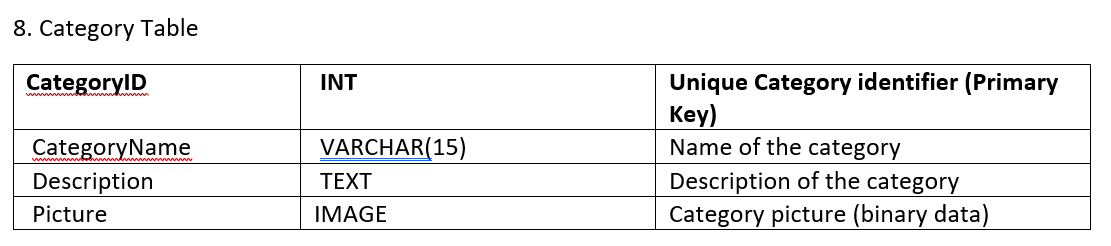

In [64]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   categoryID    8 non-null      int64 
 1   categoryName  8 non-null      object
 2   description   8 non-null      object
 3   picture       8 non-null      object
dtypes: int64(1), object(3)
memory usage: 384.0+ bytes


In [65]:
category.head()

,categoryID,categoryName,description,picture
0,1,Beverages,Soft drinks coffees teas beers and ales,0x151C2F00020000000D000E0014002100FFFFFFFF4269...
1,2,Condiments,Sweet and savory sauces relishes spreads and s...,0x151C2F00020000000D000E0014002100FFFFFFFF4269...
2,3,Confections,Desserts candies and sweet breads,0x151C2F00020000000D000E0014002100FFFFFFFF4269...
3,4,Dairy Products,Cheeses,0x151C2F00020000000D000E0014002100FFFFFFFF4269...
4,5,Grains/Cereals,Breads crackers pasta and cereal,0x151C2F00020000000D000E0014002100FFFFFFFF4269...


In [66]:
for col in category.columns:
    max_l = category[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

categoryID - 1
categoryName - 14
description - 55
picture - 256


In [67]:
for col in category.columns:
    dupli = category[col].duplicated().any()
    print(f"{col} - {dupli}")

categoryID - False
categoryName - False
description - False
picture - True


In [68]:
category.nunique()

categoryID      8
categoryName    8
description     8
picture         1
dtype: int64

## Employee Territory
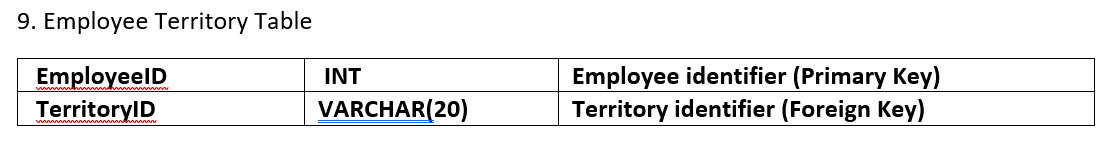

In [69]:
employee_territory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   employeeID   49 non-null     int64
 1   territoryID  49 non-null     int64
dtypes: int64(2)
memory usage: 912.0 bytes


In [70]:
employee_territory.head()

,employeeID,territoryID
0,1,6897
1,1,19713
2,2,1581
3,2,1730
4,2,1833


In [71]:
for col in employee_territory.columns:
    max_l = employee_territory[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

employeeID - 1
territoryID - 5


In [72]:
for col in employee_territory.columns:
    dupli = employee_territory[col].duplicated().any()
    print(f"{col} - {dupli}")

employeeID - True
territoryID - False


In [73]:
employee_territory.nunique()

employeeID      9
territoryID    49
dtype: int64

## Region
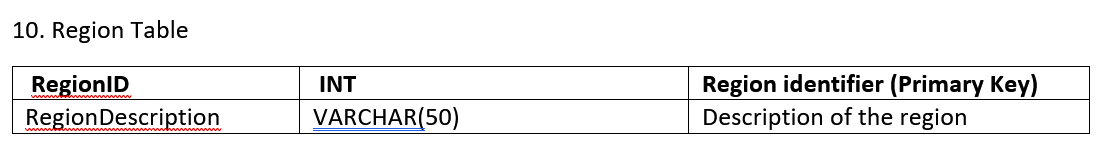

In [74]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   regionID           4 non-null      int64 
 1   regionDescription  4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


In [75]:
region.head()

,regionID,regionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


## Territory
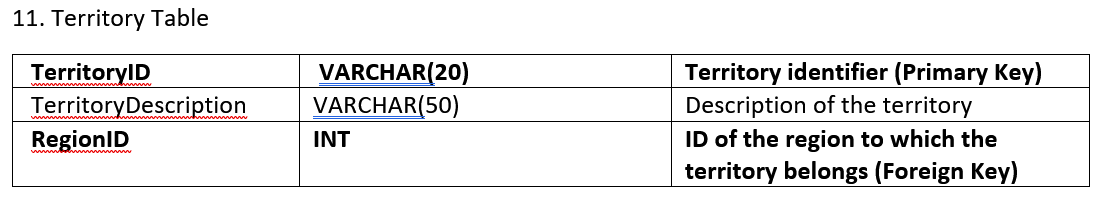

In [76]:
territory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   territoryID           53 non-null     int64 
 1   territoryDescription  53 non-null     object
 2   regionID              53 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ KB


In [78]:
territory.head()

,territoryID,territoryDescription,regionID
0,1581,Westboro,1
1,1730,Bedford,1
2,1833,Georgetow,1
3,2116,Boston,1
4,2139,Cambridge,1


In [79]:
for col in territory.columns:
    max_l = territory[col].astype(str).map(len).max()
    print(f"{col} - {max_l}")

territoryID - 5
territoryDescription - 15
regionID - 1


In [80]:
for col in territory.columns:
    dupli = territory[col].duplicated().any()
    print(f"{col} - {dupli}")

territoryID - False
territoryDescription - True
regionID - True


In [81]:
territory[territory.duplicated(subset=['territoryDescription'], keep=False)]

,territoryID,territoryDescription,regionID
12,10019,NewYork,1
13,10038,NewYork,1


In [82]:
territory.nunique()

territoryID             53
territoryDescription    52
regionID                 4
dtype: int64